##### Kaggle cell

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Lets begin

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

#### Load datasets and first view

In [3]:
path = './dataset/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Get basic informations like Shape, info etc

In [6]:
def show_basic_informations(dataset):
    print(f" shape : {dataset.shape}")
    print()
    print(f" info {dataset.info()}")
    print()
    print(f" columns : {dataset.columns}")
    print()
    print(f" duplicates : {dataset.duplicated().sum()}")
    print()
    # print(f" Null counts {dataset.isna().sum()}")
    print(f" Describe :{dataset.describe()}")
    print()
    print()
    print(f" Describe Object Column : {dataset.describe(include='object')}")

In [7]:
show_basic_informations(train)

 shape : (1460, 82)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   Id             1460 non-null   int64  
 2   MSSubClass     1460 non-null   int64  
 3   MSZoning       1460 non-null   object 
 4   LotFrontage    1201 non-null   float64
 5   LotArea        1460 non-null   int64  
 6   Street         1460 non-null   object 
 7   Alley          91 non-null     object 
 8   LotShape       1460 non-null   object 
 9   LandContour    1460 non-null   object 
 10  Utilities      1460 non-null   object 
 11  LotConfig      1460 non-null   object 
 12  LandSlope      1460 non-null   object 
 13  Neighborhood   1460 non-null   object 
 14  Condition1     1460 non-null   object 
 15  Condition2     1460 non-null   object 
 16  BldgType       1460 non-null   object 
 17  HouseStyle     1460 non-null   

In [8]:
show_basic_informations(test)

 shape : (1459, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1459 non-null   int64  
 1   Id             1459 non-null   int64  
 2   MSSubClass     1459 non-null   int64  
 3   MSZoning       1455 non-null   object 
 4   LotFrontage    1232 non-null   float64
 5   LotArea        1459 non-null   int64  
 6   Street         1459 non-null   object 
 7   Alley          107 non-null    object 
 8   LotShape       1459 non-null   object 
 9   LandContour    1459 non-null   object 
 10  Utilities      1457 non-null   object 
 11  LotConfig      1459 non-null   object 
 12  LandSlope      1459 non-null   object 
 13  Neighborhood   1459 non-null   object 
 14  Condition1     1459 non-null   object 
 15  Condition2     1459 non-null   object 
 16  BldgType       1459 non-null   object 
 17  HouseStyle     1459 non-null   

#### Missing values analysis

In [9]:
def null_calculator(dataset):
    missing_count = dataset.isna().sum().reset_index()
    missing_count.rename(columns={0:'missing_count'}, inplace= True)
    missing_percentage = round(dataset.isna().sum()/len(dataset)*100,2)
    missing_count['missing_percentage'] = missing_percentage.values
    return missing_count

In [10]:
null_calculator(train)

,index,missing_count,missing_percentage
0,Unnamed: 0,0,0.00
1,Id,0,0.00
2,MSSubClass,0,0.00
3,MSZoning,0,0.00
4,LotFrontage,259,17.74
5,LotArea,0,0.00
6,Street,0,0.00
7,Alley,1369,93.77
8,LotShape,0,0.00
9,LandContour,0,0.00


In [11]:
null_calculator(test)

,index,missing_count,missing_percentage
0,Unnamed: 0,0,0.00
1,Id,0,0.00
2,MSSubClass,0,0.00
3,MSZoning,4,0.27
4,LotFrontage,227,15.56
5,LotArea,0,0.00
6,Street,0,0.00
7,Alley,1352,92.67
8,LotShape,0,0.00
9,LandContour,0,0.00


#### Unique values

In [12]:
categorical_cols = list(train.describe(include='object').columns)
def get_unique_values(dataset, cols):
    temp= {}
    for col in cols:
        temp[col]= list(dataset[col].unique())
    return temp
train.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
index,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1460,1460,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [13]:
get_unique_values(train, categorical_cols)

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
 'Street': ['Pave', 'Grvl'],
 'Alley': [nan, 'Grvl', 'Pave'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['CollgCr',
  'Veenker',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'MeadowV',
  'Edwards',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'NPkVill',
  'Blmngtn',
  'BrDale',
  'SWISU',
  'Blueste'],
 'Condition1': ['Norm',
  'Feedr',
  'PosN',
  'Artery',
  'RRAe',
  'RRNn',
  'RRAn',
  'PosA',
  'RRNe'],
 'Condition2': ['Norm',
  'Artery',
  'RRNn',
  'Feedr',
  'PosN',
  'PosA',
  'RRAn',
  'RRAe'],
 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
 'HouseStyle': ['2Story',
  '1Story',
  '1.5Fin',
  '1.5Unf',
  

In [14]:
get_unique_values(test, categorical_cols)

{'MSZoning': ['RH', 'RL', 'RM', 'FV', 'C (all)', nan],
 'Street': ['Pave', 'Grvl'],
 'Alley': [nan, 'Pave', 'Grvl'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'HLS', 'Bnk', 'Low'],
 'Utilities': ['AllPub', nan],
 'LotConfig': ['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['NAmes',
  'Gilbert',
  'StoneBr',
  'BrDale',
  'NPkVill',
  'NridgHt',
  'Blmngtn',
  'NoRidge',
  'Somerst',
  'SawyerW',
  'Sawyer',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'ClearCr',
  'SWISU',
  'Edwards',
  'CollgCr',
  'Crawfor',
  'Blueste',
  'IDOTRR',
  'Mitchel',
  'Timber',
  'MeadowV',
  'Veenker'],
 'Condition1': ['Feedr',
  'Norm',
  'PosN',
  'RRNe',
  'Artery',
  'RRNn',
  'PosA',
  'RRAn',
  'RRAe'],
 'Condition2': ['Norm', 'Feedr', 'PosA', 'PosN', 'Artery'],
 'BldgType': ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'],
 'HouseStyle': ['1Story',
  '2Story',
  'SLvl',
  '1.5Fin',
  'SFoyer',
  '2.5Unf',
  '1.5Unf'],
 'Roo

# Data Wrangling

#### Define Functions

In [19]:
def get_mean(dataset, col1, col2='SalePrice'):
    return dataset.groupby(col1)[col2].mean().reset_index().T

#### Copy dataset and drop unwanted column

In [15]:
df = train.copy()
df = df.drop(columns= ['Unnamed: 0'])

#### Analysis

In [18]:
for col in categorical_cols:
    display(get_mean(df, col))

,0,1,2,3,4
MSZoning,C (all),FV,RH,RL,RM
SalePrice,74528.0,214014.061538,131558.375,191004.994787,126316.830275


,0,1
Street,Grvl,Pave
SalePrice,130190.5,181130.538514


,0,1
Alley,Grvl,Pave
SalePrice,122219.08,168000.585366


,0,1,2,3
LotShape,IR1,IR2,IR3,Reg
SalePrice,206101.665289,239833.365854,216036.5,164754.818378


,0,1,2,3
LandContour,Bnk,HLS,Low,Lvl
SalePrice,143104.079365,231533.94,203661.111111,180183.746758


,0,1
Utilities,AllPub,NoSeWa
SalePrice,180950.95682,137500.0


,0,1,2,3,4
LotConfig,Corner,CulDSac,FR2,FR3,Inside
SalePrice,181623.425856,223854.617021,177934.574468,208475.0,176938.047529


,0,1,2
LandSlope,Gtl,Mod,Sev
SalePrice,179956.799566,196734.138462,204379.230769


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
SalePrice,194870.882353,137500.0,104493.75,124834.051724,212565.428571,197965.773333,210624.72549,128219.7,192854.506329,100123.783784,98576.470588,156270.122449,145847.08,142694.444444,189050.068493,335295.317073,316270.623377,128225.300885,142591.36,136793.135135,186555.79661,225379.837209,310499.0,242247.447368,238772.727273


,0,1,2,3,4,5,6,7,8
Condition1,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
SalePrice,135091.666667,142475.481481,184495.492063,225875.0,215184.210526,138400.0,184396.615385,190750.0,212400.0


,0,1,2,3,4,5,6,7
Condition2,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
SalePrice,106500.0,121166.666667,181169.405536,325000.0,284875.0,190000.0,136905.0,96750.0


,0,1,2,3,4
BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
SalePrice,185763.807377,128432.258065,133541.076923,135911.627907,181959.342105


,0,1,2,3,4,5,6,7
HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
SalePrice,143116.74026,110150.0,175985.477961,220000.0,157354.545455,210051.764045,135074.486486,166703.384615


,0,1,2,3,4,5
RoofStyle,Flat,Gable,Gambrel,Hip,Mansard,Shed
SalePrice,194690.0,171483.956179,148909.090909,218876.933566,180568.428571,225000.0


,0,1,2,3,4,5,6,7
RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
SalePrice,160000.0,179803.679219,241500.0,180000.0,137000.0,185406.363636,241400.0,390250.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Exterior1st,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
SalePrice,107385.55,100000.0,71000.0,194573.0,105000.0,231690.655738,163077.45045,262000.0,149422.177273,175942.37963,258500.0,162990.0,213732.900971,149841.645631,150655.076923


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
SalePrice,114060.55,138000.0,126714.285714,195818.0,105000.0,230093.833333,167661.565217,252070.0,149803.172897,319000.0,168112.387324,158224.8,155905.153846,214432.460317,148386.06599,161328.947368


,0,1,2
MasVnrType,BrkCmn,BrkFace,Stone
SalePrice,146318.066667,204691.87191,265583.625


,0,1,2,3
ExterQual,Ex,Fa,Gd,TA
SalePrice,367360.961538,87985.214286,231633.510246,144341.313466


,0,1,2,3,4
ExterCond,Ex,Fa,Gd,Po,TA
SalePrice,201333.333333,102595.142857,168897.568493,76500.0,184034.896256


,0,1,2,3,4,5
Foundation,BrkTil,CBlock,PConc,Slab,Stone,Wood
SalePrice,132291.075342,149805.714511,225230.44204,107365.625,165959.166667,185666.666667


,0,1,2,3
BsmtQual,Ex,Fa,Gd,TA
SalePrice,327041.041322,115692.028571,202688.478964,140759.818182


,0,1,2,3
BsmtCond,Fa,Gd,Po,TA
SalePrice,121809.533333,213599.907692,64000.0,183632.6209


,0,1,2,3
BsmtExposure,Av,Gd,Mn,No
SalePrice,206643.420814,257689.80597,192789.657895,165652.295908


,0,1,2,3,4,5
BsmtFinType1,ALQ,BLQ,GLQ,LwQ,Rec,Unf
SalePrice,161573.068182,149493.655405,235413.720096,151852.702703,146889.24812,170670.576744


,0,1,2,3,4,5
BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf
SalePrice,209942.105263,151101.0,180982.142857,164364.130435,164917.12963,184694.690287


,0,1,2,3,4,5
Heating,Floor,GasA,GasW,Grav,OthW,Wall
SalePrice,72500.0,182021.195378,166632.166667,75271.428571,125750.0,92100.0


,0,1,2,3,4
HeatingQC,Ex,Fa,Gd,Po,TA
SalePrice,214914.42915,123919.489796,156858.871369,87000.0,142362.876168


,0,1
CentralAir,N,Y
SalePrice,105264.073684,186186.70989


,0,1,2,3,4
Electrical,FuseA,FuseF,FuseP,Mix,SBrkr
SalePrice,122196.893617,107675.444444,97333.333333,67000.0,186825.113193


,0,1,2,3
KitchenQual,Ex,Fa,Gd,TA
SalePrice,328554.67,105565.205128,212116.023891,139962.511565


,0,1,2,3,4,5,6
Functional,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ
SalePrice,153948.142857,85800.0,146385.483871,144240.647059,168393.333333,129000.0,183429.147059


,0,1,2,3,4
FireplaceQu,Ex,Fa,Gd,Po,TA
SalePrice,337712.5,167298.484848,226351.415789,129764.15,205723.488818


,0,1,2,3,4,5
GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
SalePrice,151283.333333,202892.656322,160570.684211,254751.738636,109962.111111,134091.162791


,0,1,2
GarageFinish,Fin,RFn,Unf
SalePrice,240052.690341,202068.869668,142156.42314


,0,1,2,3,4
GarageQual,Ex,Fa,Gd,Po,TA
SalePrice,241000.0,123573.354167,215860.714286,100166.666667,187489.836003


,0,1,2,3,4
GarageCond,Ex,Fa,Gd,Po,TA
SalePrice,124000.0,114654.028571,179930.0,108500.0,187885.735294


,0,1,2
PavedDrive,N,P,Y
SalePrice,115039.122222,132330.0,186433.973881


,0,1,2
PoolQC,Ex,Fa,Gd
SalePrice,490000.0,215500.0,201990.0


,0,1,2,3
Fence,GdPrv,GdWo,MnPrv,MnWw
SalePrice,178927.457627,140379.314815,148751.089172,134286.363636


,0,1,2,3
MiscFeature,Gar2,Othr,Shed,TenC
SalePrice,170750.0,94000.0,151187.612245,250000.0


,0,1,2,3,4,5,6,7,8
SaleType,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
SalePrice,143973.255814,210600.0,269600.0,138780.888889,200390.0,143700.0,274945.418033,119850.0,173401.836622


,0,1,2,3,4,5
SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
SalePrice,146526.623762,104125.0,167377.416667,149600.0,175202.219533,272291.752


In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 

### Visualization

#### Define your functions

D:\DataScience\almabettr\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataScience\almabettr\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

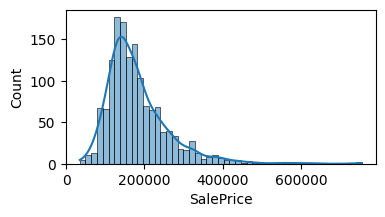

In [32]:
plt.rcParams['figure.figsize'] = (4,2)
sns.histplot(df['SalePrice'], kde=True)

In [39]:
cols = list(df.describe().columns)

In [54]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,4))
# sns.histplot(df[cols[1]], ax=axes[0][0])
def subplots2by3(cols,shape=[2,3]):
    # fig, axes = plt.subplots(nrows= shape[0], ncols= shape[1], figsize=(12,4))
    for i,col in enumerate(cols):
        # for j in range(shape[1]):
        #     sns.histplot(df[col], ax=axes[i][j])
        #     plt.show()
        print(i, col)

In [55]:
subplots2by3(cols=cols[1:7])

0 MSSubClass
1 LotFrontage
2 LotArea
3 OverallQual
4 OverallCond
5 YearBuilt


In [1]:
93*4

372